In [2]:
#loanding pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as re

%matplotlib inline 

#Loading langdetect
import langdetect
from langdetect import detect

In [10]:
#READ IN CSV HERE>>
df_final_1 = pd.read_csv('df_final.csv')

#Should load in a .csv file with (23123,6) dimentions
df_final_1.head()

,tweet_id,tweet_date,tweet_username,tweet_text,tweet_text_frmtted,lang
0,4.580312e+17,2014-04-20,MunichDE,clear -> mostly cloudy temperature down 12°C -...,clear -> mostly cloudy temperature down 12°C -...,en
1,4.580311e+17,2014-04-20,kartenquizde,Wo liegt Miesbach? http://www.kartenquiz.de/Mi...,Wo liegt Miesbach? http://www.kartenquiz.de/Mi...,de
2,4.580307e+17,2014-04-20,EthubWerner,@andreasdotorg @das_heilige Nicht verschlucken,@andreasdotorg @das_heilige Nicht verschlucken,de
3,4.580307e+17,2014-04-20,lucianayuka,Dyed my hair reddish brown yesterday and I sti...,Dyed my hair reddish brown yesterday and I sti...,en
4,4.580303e+17,2014-04-20,EthubWerner,@das_heilige Gut gekontert.Weiter so :-) @andr...,@das_heilige Gut gekontert.Weiter so :-) @andr...,de


## 2. Data analysis and visualization

In [11]:
import datetime as datetime

In [12]:
print(df_final_1.groupby(["lang"])["lang"].count().reset_index(name="lang_count").sort_values(by='lang_count', ascending=False))


                  lang  lang_count
7                   de       10036
9                   en        6434
42                  tr         751
14                  fr         702
1                   ar         665
10                  es         602
30                  pt         564
32                  ru         320
19                  it         317
27                  nl         223
0                   af         183
20                  ja         175
40                  th         155
35                  so         153
28                  no         147
37                  sv         146
18                  id         139
29                  pl         136
3                   ca         125
6                   da         114
16                  hr         112
11                  et          92
12                  fa          81
41                  tl          74
31                  ro          68
13                  fi          56
34                  sl          55
2                   

In [13]:
#total langauge in DataSet
print(df_final_1.lang.unique())

['en' 'de' 'pt' 'ca' 'lv' 'tr' 'fr' 'th' 'da' 'nl' 'it' 'es' 'tl' 'so'
 'ar' 'mk' 'af' 'hr' 'id' 'ur' 'fa' 'bg' 'no' 'fi' 'et' 'sl' 'cy' 'ja'
 'sv' 'pl' 'vi' 'cs' 'sw' 'uk' 'ru' 'ro' nan 'sq' 'lt' 'hu' 'el' 'sk' 'ko'
 'lang detect failed' 'he' 'ne' 'zh-cn' 'ta' 'zh-tw']


In [14]:
#by Group
#create table with total daily counts
day_total_count = df_final_1.groupby(["tweet_date"])["lang"].count()\
                                             .reset_index(name="day_total_count")

#create table broken out by day and lang
day_lang_count = df_final_1[df_final_1.lang.isin(['ar','tr','en','de','es','fr'])].groupby(["tweet_date","lang"])["lang"].count()\
                                             .reset_index(name="lang_day_count")\
                                             .sort_values(by=['lang','tweet_date'], ascending=False)

#Join two tables together
day_lang_count_2 = day_lang_count.merge(day_total_count, left_on='tweet_date', right_on='tweet_date')
# creating a column for the daily language share
day_lang_count_2['lang_share_day'] = day_lang_count_2.lang_day_count/day_lang_count_2.day_total_count*100

In [15]:
line_graph_2_lang = day_lang_count_2.set_index(['tweet_date','lang'], drop = False)
line_graph_2_lang_pivot = line_graph_2_lang.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [16]:
line_graph_2_lang_pivot

lang,ar,de,en,es,fr,tr
tweet_date,,,,,,
2014-04-20,2.657807,34.219269,30.481728,3.073090,5.564784,3.903654
2014-07-20,4.857621,31.742044,29.899497,5.443886,5.360134,5.360134
2014-10-20,4.976303,46.800948,24.763033,2.488152,2.014218,2.251185
2015-01-20,1.556886,44.670659,33.652695,1.437126,0.718563,2.275449
2015-04-20,3.103103,39.639640,29.229229,2.302302,2.202202,4.104104
2015-07-20,1.441441,58.018018,22.342342,0.900901,NaN,1.081081
2015-10-20,2.277433,57.349896,25.672878,0.621118,0.414079,1.035197
2016-01-20,2.535211,56.619718,28.450704,0.563380,NaN,NaN
2016-04-20,0.924214,61.737523,22.550832,0.184843,NaN,0.554529


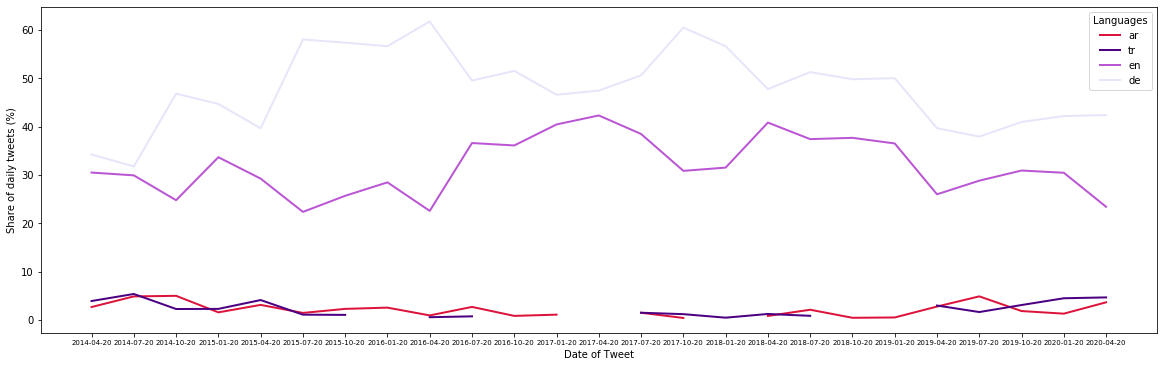

In [17]:
#creating out line graph
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(line_graph_2_lang_pivot.ar, color='crimson', linewidth=2)
plt.plot(line_graph_2_lang_pivot.tr, color='indigo', linewidth=2)
plt.plot(line_graph_2_lang_pivot.en, color='mediumorchid', linewidth=2)
plt.plot(line_graph_2_lang_pivot.de, color='lavender', linewidth=2)
# plt.plot(line_graph_2_lang_pivot.fr, color='blue', linewidth=2)
# plt.plot(line_graph_2_lang_pivot.es, color='lavender', linewidth=2)
plt.xlabel("Date of Tweet", fontsize=10)
plt.ylabel("Share of daily tweets (%)", fontsize=10)
plt.legend(["ar","tr",'en',"de","fr","es"], bbox_to_anchor=(1,1), fontsize=10, title = 'Languages')
ax.tick_params(axis="x", labelsize=7)
plt.savefig('language_share_over_time.png')

In [41]:
lang_pie = df_final_1.groupby(["tweet_date","lang"])["lang"].count().reset_index(name="lang_day_count").sort_values(by=['lang','tweet_date'], ascending=False)
lang_pie2 = lang_pie.merge(day_total_count, left_on='tweet_date', right_on='tweet_date')
lang_pie2['lang_share_day'] = lang_pie2.lang_day_count/lang_pie2.day_total_count*100
lang_pie3 = lang_pie2.set_index(['tweet_date','lang'], drop = False)
lang_pie3_pivot = lang_pie3.pivot(index='tweet_date', columns='lang', values='lang_share_day')

In [45]:
lang_pie3_pivot = lang_pie3_pivot.fillna(0)
lang_pie3_pivot

lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sw,ta,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.498339,2.657807,0.083056,1.411960,0.249169,0.332226,0.581395,34.219269,0.000000,30.481728,...,0.083056,0.000000,1.162791,0.581395,3.903654,0.083056,0.249169,0.166113,0.000000,0.000000
2014-07-20,0.753769,4.857621,0.251256,0.670017,0.167504,0.586265,0.502513,31.742044,0.167504,29.899497,...,0.167504,0.000000,0.000000,0.335008,5.360134,0.167504,0.167504,0.083752,0.000000,0.000000
2014-10-20,0.592417,4.976303,1.066351,0.236967,0.000000,0.000000,0.355450,46.800948,0.355450,24.763033,...,0.000000,0.000000,0.000000,0.236967,2.251185,0.000000,0.000000,0.118483,0.000000,0.000000
2015-01-20,0.958084,1.556886,0.119760,0.000000,0.000000,0.000000,0.598802,44.670659,0.119760,33.652695,...,0.359281,0.000000,0.000000,0.479042,2.275449,0.000000,0.000000,0.000000,0.000000,0.000000
2015-04-20,0.500501,3.103103,0.200200,0.300300,0.100100,0.100100,0.500501,39.639640,0.000000,29.229229,...,0.300300,0.000000,1.101101,0.600601,4.104104,0.000000,0.000000,0.000000,0.000000,0.000000
2015-07-20,2.702703,1.441441,0.360360,0.180180,0.000000,0.180180,0.180180,58.018018,0.000000,22.342342,...,0.000000,0.000000,0.000000,0.180180,1.081081,0.000000,0.000000,0.000000,0.000000,0.000000
2015-10-20,3.312629,2.277433,0.828157,0.207039,0.000000,0.414079,0.207039,57.349896,0.000000,25.672878,...,0.000000,0.000000,0.207039,0.621118,1.035197,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-20,3.661972,2.535211,0.000000,0.000000,0.000000,0.281690,0.281690,56.619718,0.000000,28.450704,...,0.281690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-04-20,1.478743,0.924214,0.000000,0.369686,0.000000,0.000000,0.554529,61.737523,0.000000,22.550832,...,0.184843,0.000000,0.554529,0.184843,0.554529,0.000000,0.000000,0.000000,0.000000,0.000000


In [273]:
lang_pie2014 = pd.DataFrame(lang_pie3_pivot.iloc[0:3].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2015 = pd.DataFrame(lang_pie3_pivot.iloc[3:7].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2016 = pd.DataFrame(lang_pie3_pivot.iloc[7:11].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2017 = pd.DataFrame(lang_pie3_pivot.iloc[11:15].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2018 = pd.DataFrame(lang_pie3_pivot.iloc[15:19].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2019 = pd.DataFrame(lang_pie3_pivot.iloc[19:23].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
lang_pie2020 = pd.DataFrame(lang_pie3_pivot.iloc[23:].sum(axis=0).div(3).sort_values(ascending=False)).rename(columns={0:'Value'})
#lang_pie4.mean(axis=0)
lang_pie2018

,Value
lang,
de,68.473387
en,49.126824
es,3.271590
it,1.965660
pt,1.469707
nl,1.141330
ar,1.116689
ca,0.889521
tr,0.840482


C:\Users\Piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


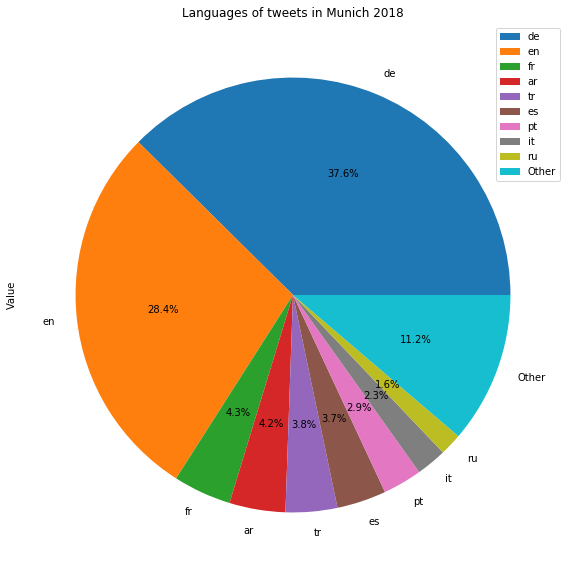

In [286]:
lang_pie2018 = pd.DataFrame(lang_pie3_pivot.iloc[0:3].sum(axis=0).div(3).sort_values(ascending=False))
lang_pie2018.columns = ['Value']
#defining the threshold 
threshold = 1
lang_pie2018_subset1 =  lang_pie2018[lang_pie2018['Value'] >= threshold]
lang_pie2018_subset2 =  lang_pie2018[lang_pie2018['Value'] < threshold]
lang_pie2018_subset1.loc['Other']= lang_pie2018_subset2.sum()

plot1 = lang_pie2018_subset1.plot.pie(y='Value', figsize=(10, 10),autopct='%1.1f%%', title="Languages of tweets in Munich 2018")
#plot1.set_title("Languages of tweets", weight="bold", color="white", size=20)

C:\Users\Piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


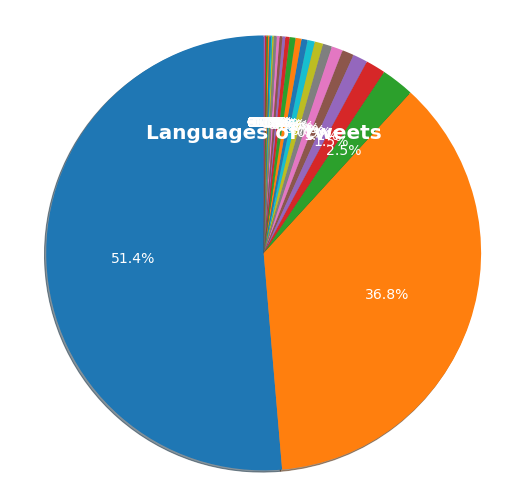

In [150]:
labels = lang_pie2018.index
fig1, ax1 = plt.subplots()
ax1.pie(lang_pie2018, labels=labels, radius=2.5, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 14, 'color':'white'}, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Languages of tweets", weight="bold", color="white", size=20)

#draw circle
# centre_circle = plt.Circle((0,0),1.9,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
#plt.tight_layout()

plt.show()